- For general descriptions see 
https://docs.scipy.org/doc/scipy/reference/stats.html
- complete list of pdf (etc) is 
https://docs.scipy.org/doc/scipy/reference/stats.html#statsrefmanual
- Examples are modified from 
https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python

### generate samples from a random variable having a poisson distribution.

(array([0.   , 0.   , 0.   , 0.   , 0.041, 0.197, 0.429, 0.646, 0.805,
        0.915, 0.971, 0.985, 0.994, 0.998, 1.   , 1.   , 1.   , 1.   ,
        1.   , 1.   , 1.   , 1.   , 1.   ]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 23 Patch objects>)

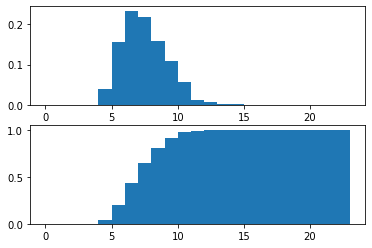

In [1]:
from matplotlib.pyplot import *
import numpy as np
import scipy
import scipy.stats
size = 1000


x = scipy.stats.poisson.rvs(3, size=size)+4 # image of a poisson distribution (with mean =7)
x_ranges = np.linspace(0,24,num=100)
figure(1)
ax=subplot(211)
hist(x, bins=range(24), density=True) # normalized by density
ax=subplot(212)
hist(x, bins=range(24), density=True, cumulative=True) # cummulated


### check avaiable probability distribution and choose model structures

In [2]:
from scipy.stats._continuous_distns import _distn_names
print(_distn_names)
dist_names = ['norm','logistic'] #['gamma', 'beta', 'rayleigh', 'norm', 'pareto']

['ksone', 'kstwo', 'kstwobign', 'norm', 'alpha', 'anglit', 'arcsine', 'beta', 'betaprime', 'bradford', 'burr', 'burr12', 'fisk', 'cauchy', 'chi', 'chi2', 'cosine', 'dgamma', 'dweibull', 'expon', 'exponnorm', 'exponweib', 'exponpow', 'fatiguelife', 'foldcauchy', 'f', 'foldnorm', 'weibull_min', 'weibull_max', 'frechet_r', 'frechet_l', 'genlogistic', 'genpareto', 'genexpon', 'genextreme', 'gamma', 'erlang', 'gengamma', 'genhalflogistic', 'gompertz', 'gumbel_r', 'gumbel_l', 'halfcauchy', 'halflogistic', 'halfnorm', 'hypsecant', 'gausshyper', 'invgamma', 'invgauss', 'geninvgauss', 'norminvgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'laplace', 'levy', 'levy_l', 'levy_stable', 'logistic', 'loggamma', 'loglaplace', 'lognorm', 'gilbrat', 'maxwell', 'mielke', 'kappa4', 'kappa3', 'moyal', 'nakagami', 'ncx2', 'ncf', 't', 'nct', 'pareto', 'lomax', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rdist', 'rayleigh', 'loguniform', 'reciprocal', 'rice', 'recipinvgauss', 'semicircular', 'skewn

### perform identification (maximum likely hood esitmation) with the model structure

norm parameters: (7.019, 1.7374230918230598)
logistic parameters: (6.917137632929301, 0.9873514409752765)


/home/adun6414/Downloads/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/adun6414/Downloads/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/adun6414/Downloads/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a pr

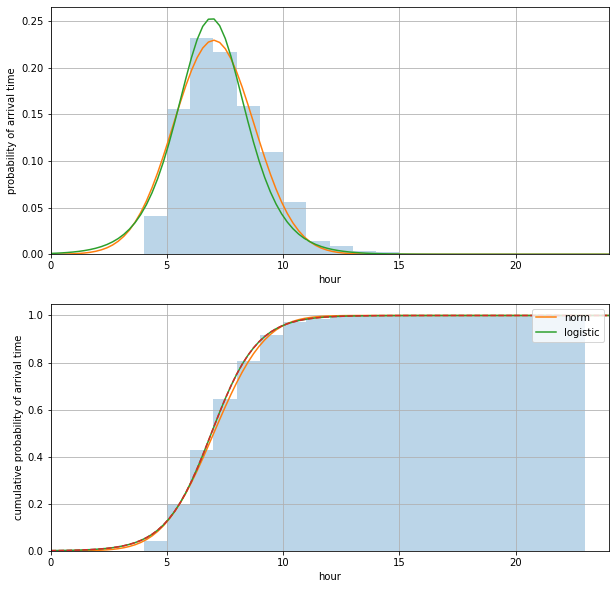

In [5]:
figure(2,figsize=(10,10))
subplot(211)
hist(x, bins=range(24), density=True, alpha =0.3) # normalized by density
grid(True)
xlabel('hour')
ylabel('probability of arrival time')
subplot(212)
hist(x, bins=range(24), density=True, cumulative=True, alpha =0.3) # cummulated
grid(True)
xlabel('hour')
ylabel('cumulative probability of arrival time')


for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name) # the same as scip.stat.dist_name
    param = dist.fit(x) # perform maximum likelyhood estimation (MLE)
    print(dist_name + ' parameters:', str(param))
    
    
    pdf_fitted = dist.pdf(x_ranges, *param[:-2], loc=param[-2], scale=param[-1]) # evaulate the estimated pdf function at x 
    cdf_fitted = dist.cdf(x_ranges, *param[:-2], loc=param[-2], scale=param[-1]) # evaulate the estimated pdf function at x 
    
    subplot(211)
    plot(x_ranges,pdf_fitted,label=dist_name)
    xlim([0,24])
    
    subplot(212)
    plot(x_ranges,cdf_fitted,label=dist_name)
    xlim([0,24])
    
legend(loc='upper right')

# Exact cdf of logistic distribution
# https://en.wikipedia.org/wiki/Logistic_distribution
def logistic_cum(x,mu,sigma):
    y=1/(1+np.exp(-(x-mu)/sigma))
    return y
y=logistic_cum(x_ranges, param[-2], param[-1])
subplot(212)
plot(x_ranges,y,'--',label=['H'])


## Analysis: Test statics, fitting, etc
https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html